<a href="https://colab.research.google.com/github/songpont/report/blob/master/workshop_14Dec2023_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
# Specify the path to your file
file_path = '/content/drive/MyDrive/PM_esan/Fire_Source_2012-2023Nov/03_Yearly_ADM_LU/combined_data.csv' # Change 'your_file.csv' to your file's name

# Read the file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

Mounted at /content/drive


<ipython-input-1-38176b3d6473>:9: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,...,frp,daynight,Year,TAM_NAM_T,AMPHOE_T,AMPHOE_E,PROV_NAM_T,PROV_NAM_E,LUL1_CODE,LUL2_CODE
0,16.04633,104.05120,312.16,0.42,0.38,2023/02/28,1849,N,VIIRS,n,...,1.25,N,2023,ต.ภูเงิน,อ.เสลภูมิ,Amphoe Sela Phum,ร้อยเอ็ด,Roi Et,A,A2
1,16.01995,104.05153,302.58,0.66,0.73,2023/03/03,1934,N,VIIRS,n,...,1.42,N,2023,ต.ภูเงิน,อ.เสลภูมิ,Amphoe Sela Phum,ร้อยเอ็ด,Roi Et,M,M1
2,16.05333,104.08307,348.88,0.43,0.38,2023/03/10,631,N,VIIRS,n,...,4.51,D,2023,ต.ภูเงิน,อ.เสลภูมิ,Amphoe Sela Phum,ร้อยเอ็ด,Roi Et,A,A2
3,16.02009,104.09893,336.05,0.34,0.56,2023/03/30,657,N,VIIRS,n,...,3.07,D,2023,ต.ภูเงิน,อ.เสลภูมิ,Amphoe Sela Phum,ร้อยเอ็ด,Roi Et,A,A1
4,16.02532,104.09833,356.00,0.34,0.56,2023/03/30,657,N,VIIRS,n,...,3.07,D,2023,ต.ภูเงิน,อ.เสลภูมิ,Amphoe Sela Phum,ร้อยเอ็ด,Roi Et,A,A3


In [2]:
import pandas as pd

# Assuming 'df' is your original DataFrame

# Convert 'acq_date' to datetime if it's not already
df['acq_date'] = pd.to_datetime(df['acq_date'])

# Group by 'acq_date' and count the occurrences (hotspots) for each date
hotspot_counts = df.groupby('acq_date').size().reset_index(name='Hotspot')

# Rename the 'acq_date' column to 'Date'
hotspot_counts.rename(columns={'acq_date': 'Date'}, inplace=True)

# The resulting DataFrame 'hotspot_counts' has columns: 'Date' and 'Hotspot'
print(hotspot_counts)

           Date  Hotspot
0    2012-01-20        1
1    2012-01-21       18
2    2012-01-22       32
3    2012-01-23       81
4    2012-01-24       27
...         ...      ...
3128 2023-11-29        5
3129 2023-11-30        4
3130 2023-12-01       13
3131 2023-12-02       22
3132 2023-12-03       26

[3133 rows x 2 columns]


In [3]:
from sklearn import linear_model

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
!pip install pystan
!pip install prophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 69.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.3 MB/s eta 0:00:00


In [6]:
hotspot_counts

,Date,Hotspot
0,2012-01-20,1
1,2012-01-21,18
2,2012-01-22,32
3,2012-01-23,81
4,2012-01-24,27
...,...,...
3128,2023-11-29,5
3129,2023-11-30,4
3130,2023-12-01,13
3131,2023-12-02,22


In [7]:
# prepare expected column names
hotspot_counts.columns = ['ds', 'y']

In [8]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'hotspot_counts' is your DataFrame

# Convert 'Date' to a numeric format (e.g., timestamp)
# hotspot_counts['Date'] = pd.to_datetime(hotspot_counts['Date']).values.astype(float)
hotspot_counts['ds'] = pd.to_datetime(hotspot_counts['ds'])

# Define your features and target variable
# X = hotspot_counts[['Date']]  # Features
# y = hotspot_counts['Hotspot']  # Target

# Split the data into training and testing sets
# train, test, = train_test_split(hotspot_counts, test_size=0.2, random_state=42)
train, test, = train_test_split(hotspot_counts, test_size=0.2, shuffle=False)

# X_train, X_test, y_train, and y_test are now your split data

In [9]:
print (train)

             ds   y
0    2012-01-20   1
1    2012-01-21  18
2    2012-01-22  32
3    2012-01-23  81
4    2012-01-24  27
...         ...  ..
2501 2021-05-06   1
2502 2021-05-07  43
2503 2021-05-08  17
2504 2021-05-09  20
2505 2021-05-10   7

[2506 rows x 2 columns]


In [10]:
import pandas as pd
import sklearn as sk
from prophet import Prophet

In [11]:
m = Prophet()
m.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjv7s_uq5/ime4tqfo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjv7s_uq5/lkipbvpu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22230', 'data', 'file=/tmp/tmpjv7s_uq5/ime4tqfo.json', 'init=/tmp/tmpjv7s_uq5/lkipbvpu.json', 'output', 'file=/tmp/tmpjv7s_uq5/prophet_modelz3a6fu67/prophet_model-20231214234601.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:46:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:46:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [12]:
print (test)

             ds   y
2506 2021-05-11  11
2507 2021-05-12  51
2508 2021-05-13   8
2509 2021-05-14  11
2510 2021-05-15   1
...         ...  ..
3128 2023-11-29   5
3129 2023-11-30   4
3130 2023-12-01  13
3131 2023-12-02  22
3132 2023-12-03  26

[627 rows x 2 columns]


In [13]:
df_test = test

In [14]:
df_test

,ds,y
2506,2021-05-11,11
2507,2021-05-12,51
2508,2021-05-13,8
2509,2021-05-14,11
2510,2021-05-15,1
...,...,...
3128,2023-11-29,5
3129,2023-11-30,4
3130,2023-12-01,13
3131,2023-12-02,22


In [15]:
df_test.drop('y',axis = 1, inplace=True)

In [16]:
df_test

,ds
2506,2021-05-11
2507,2021-05-12
2508,2021-05-13
2509,2021-05-14
2510,2021-05-15
...,...
3128,2023-11-29
3129,2023-11-30
3130,2023-12-01
3131,2023-12-02


In [17]:
forecast = m.predict(df_test)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
622,2023-11-29,-259.782631,-506.715449,-6.549859
623,2023-11-30,-262.064494,-511.713894,-26.125605
624,2023-12-01,-262.761946,-539.477801,-24.753360
625,2023-12-02,-261.357542,-495.253856,-16.177140
626,2023-12-03,-253.110391,-510.140491,6.636410


จำนวน hotspot ไม่ควรติดลบ

In [29]:
# Make predictions
forecast = m.predict(df_test)

# Ensure that 'yhat_lower' and 'yhat_upper' are not less than 0
forecast['yhat_lower'] = forecast['yhat_lower'].clip(lower=0)
forecast['yhat_upper'] = forecast['yhat_upper'].clip(lower=0)

# If 'yhat' also should not be negative, apply the same logic
forecast['yhat'] = forecast['yhat'].clip(lower=0)

# Display the last few rows of the adjusted forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
622,2023-11-29,0.0,0.0,0.00000
623,2023-11-30,0.0,0.0,0.00000
624,2023-12-01,0.0,0.0,0.00000
625,2023-12-02,0.0,0.0,2.71489
626,2023-12-03,0.0,0.0,0.00000


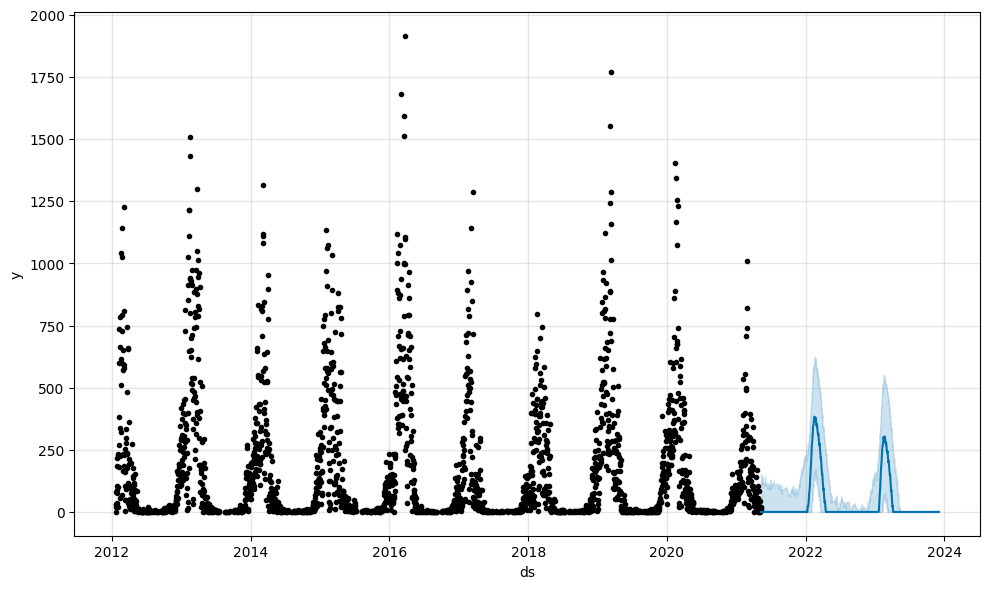

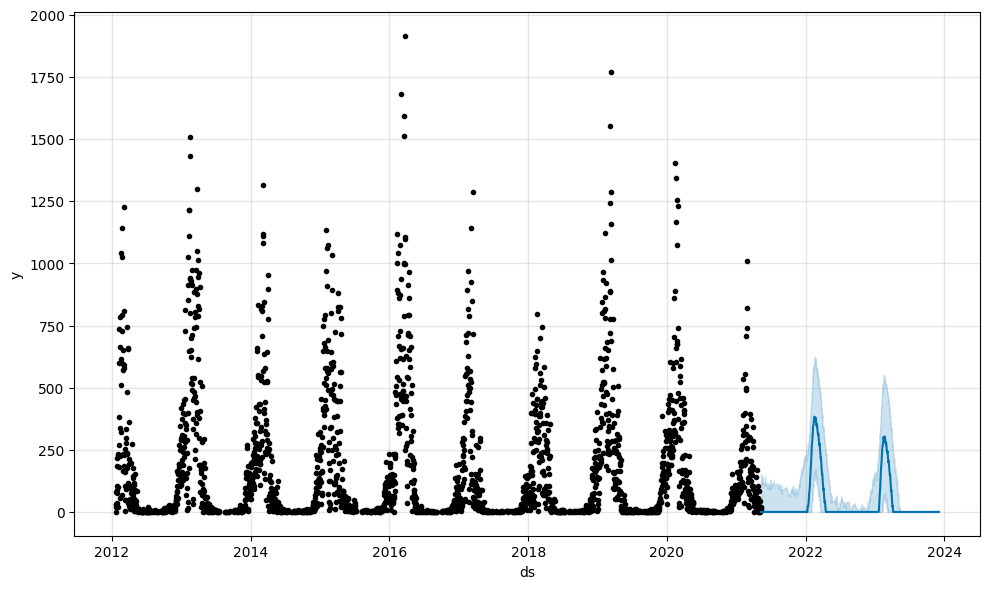

In [19]:
m.plot(forecast)